# MNIST Dataset Classification with **_K-Nearest Neighbors_**

## Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
import statsmodels.api as sm

In [2]:
# load the data
digits = load_digits(as_frame=True)

In [3]:
chosen_digits = (0, 1, 2, 3, 4, 5, 7, 8, 9)

chosen_digits_mask = digits.target.isin(chosen_digits)

chosen_digits_images = digits.images[chosen_digits_mask]
y = digits.target[chosen_digits_mask].values
x = digits.data[chosen_digits_mask].values

## Examples of Digits

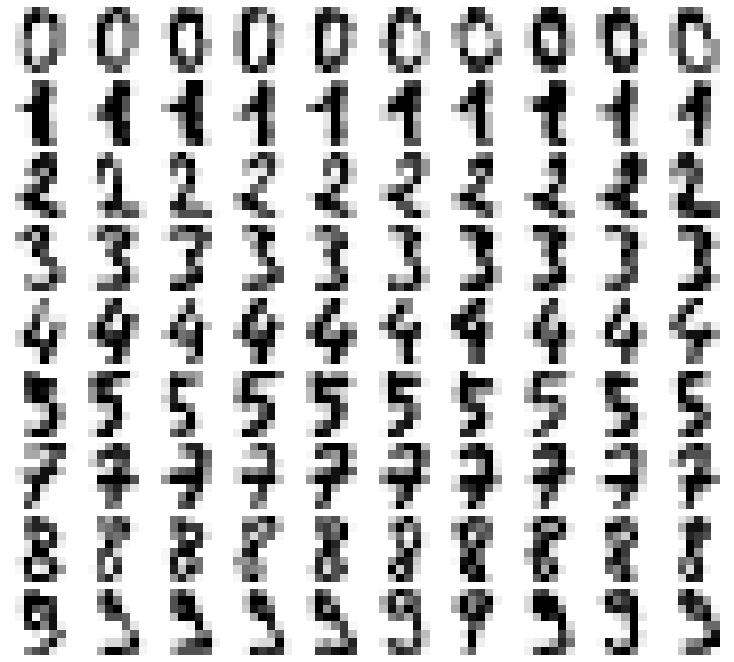

In [4]:
examples_per_digit = 10
fig, axes = plt.subplots(len(chosen_digits), examples_per_digit, figsize=(examples_per_digit, len(chosen_digits)))

for i in range(len(chosen_digits)):
    for j in range(examples_per_digit):
        axes[i, j].imshow(digits.images[digits.target == chosen_digits[i]][j], cmap='Greys')
        axes[i, j].axis('off')

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.1, wspace=0.1)
plt.show()

## Training the Model

In [5]:
classifier = KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 10, 25],
}

In [6]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, chosen_digits_images)

model = classifier()

grid_search = GridSearchCV(model, n_jobs=4, param_grid=param_grid, verbose=5)
grid_search.fit(x_train, y_train)

print('Best params:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'n_neighbors': 1}
Best score: 0.988446757133626


## Results

In [7]:
model = classifier(**grid_search.best_params_).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))

F-1 Score: 0.9876237623762376


### Misclassified Digits

In [8]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=pd.Series(chosen_digits, name='True'),
             columns=pd.Series(chosen_digits, name='Pred'))

Pred,0,1,2,3,4,5,7,8,9
True,,,,,,,,,
0,42,0,0,0,0,0,0,0,0
1,0,44,0,0,0,0,0,0,0
2,0,0,40,0,0,0,0,0,0
3,0,0,0,51,0,0,0,0,0
4,0,0,0,0,37,0,0,0,0
5,0,0,0,0,0,57,0,0,1
7,0,0,0,0,0,0,46,0,0
8,0,1,0,0,0,0,0,41,0
9,0,1,0,1,1,0,0,0,41


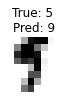

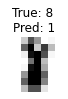

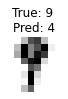

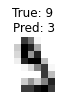

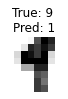

In [9]:
misclassified_inds = np.arange(len(y_pred))[y_test != y_pred]

for idx in misclassified_inds:
    plt.figure(figsize=(1, 1))
    plt.imshow(img_test[idx], cmap='Greys')
    plt.title(f'True: {y_test[idx]} \nPred: {y_pred[idx]}', {'size': 12})
    plt.axis('off')
    plt.subplots_adjust(top=None, bottom=None, right=1, left=0)
    plt.show()